In [657]:
import pandas as pd
import matplotlib.pyplot as plt

In [658]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [659]:
sales_data = pd.read_csv("pc_parts_sales.csv")

### The problems to solve

1. **Calculate Total Sales by Month**
2. **Identify the Best-Selling Product**
3. **Analyze Sales by City**
4. **Analyze Sales by Country**
5. **Determine What Countries Individual Products Are Sold Most**

### Descriptive statistics

In [660]:
sales_data.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country
0,OP89504310,HDD,3.32,61.03,12/12/2023,Chicago,United States
1,IP83558271,Keyboard,4.35,66.18,07/21/2024,Berlin,Germany
2,FW46738968,Case,8.36,308.57,07/15/2024,Mobile,United States
3,HJ32275080,SSD,9.31,135.44,02/14/2024,Wilmington,United States
4,XC48442442,Wireless Adapter,1.89,339.28,07/03/2024,Dillenburg,Germany
5,XA53374264,Power Supply,9.23,NaN,07/12/2024,Carson City,United States
6,YA03838812,Motherboard,4.53,183.58,11/20/2023,Oklahoma City,United States
7,TJ99372180,Microphone,5.16,22.38,12/25/2023,San Jose,United States
8,HW73990535,Cooling Fan,2.73,123.03,04/29/2024,Dresden,Germany
9,CD90844685,Power Supply,1.54,21.14,04/08/2024,Pittsburgh,United States


In [661]:
sales_data.describe()

,quantity_ordered,price_each
count,"1,000.00",927.00
mean,5.48,206.65
std,2.57,110.55
min,1.03,20.85
25%,3.32,109.87
50%,5.45,204.35
75%,7.58,305.52
max,9.99,399.58


### Data cleaning

In [662]:
sales_data_cleaned = sales_data[['product', 'quantity_ordered', 'price_each', 'order_date', 'purchase_address_city', 'purchase_address_country']]
sales_data.head(4)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country
0,OP89504310,HDD,3.32,61.03,12/12/2023,Chicago,United States
1,IP83558271,Keyboard,4.35,66.18,07/21/2024,Berlin,Germany
2,FW46738968,Case,8.36,308.57,07/15/2024,Mobile,United States
3,HJ32275080,SSD,9.31,135.44,02/14/2024,Wilmington,United States


In [663]:
sales_data_cleaned.isnull().sum()

product                      0
quantity_ordered             0
price_each                  73
order_date                   0
purchase_address_city       67
purchase_address_country    54
dtype: int64

In [664]:
sales_data_cleaned.dropna(inplace=True)

In [665]:
sales_data_cleaned['quantity_ordered'] = sales_data_cleaned['quantity_ordered'].round().astype(int)

In [666]:
sales_data_cleaned['total_price'] = sales_data_cleaned['price_each'] * sales_data_cleaned['quantity_ordered']

In [667]:
sales_data_cleaned['order_date'] = pd.to_datetime(sales_data_cleaned['order_date'])

In [668]:
print(f"Number of dropped rows: {len(sales_data.axes[0]) - len(sales_data_cleaned.axes[0])}")

Number of dropped rows: 184


In [669]:
sales_data_cleaned.isnull().sum()

product                     0
quantity_ordered            0
price_each                  0
order_date                  0
purchase_address_city       0
purchase_address_country    0
total_price                 0
dtype: int64

In [670]:
sales_data_cleaned.head(10)

,product,quantity_ordered,price_each,order_date,purchase_address_city,purchase_address_country,total_price
0,HDD,3,61.03,2023-12-12,Chicago,United States,183.09
1,Keyboard,4,66.18,2024-07-21,Berlin,Germany,264.72
2,Case,8,308.57,2024-07-15,Mobile,United States,"2,468.56"
3,SSD,9,135.44,2024-02-14,Wilmington,United States,"1,218.96"
4,Wireless Adapter,2,339.28,2024-07-03,Dillenburg,Germany,678.56
6,Motherboard,5,183.58,2023-11-20,Oklahoma City,United States,917.90
7,Microphone,5,22.38,2023-12-25,San Jose,United States,111.90
8,Cooling Fan,3,123.03,2024-04-29,Dresden,Germany,369.09
9,Power Supply,2,21.14,2024-04-08,Pittsburgh,United States,42.28
10,Power Supply,7,146.25,2023-10-28,Denton,United States,"1,023.75"


In [671]:
sales_data_cleaned[['quantity_ordered', 'price_each', 'total_price']].describe()

,quantity_ordered,price_each,total_price
count,816.00,816.00,816.00
mean,5.44,204.51,"1,124.81"
std,2.59,110.04,846.21
min,1.00,20.85,23.42
25%,3.00,107.33,410.12
50%,5.00,199.46,922.45
75%,7.00,301.25,"1,654.22"
max,10.00,399.58,"3,843.90"


### Exploratory data analysis

##### Total Revenue Per Month

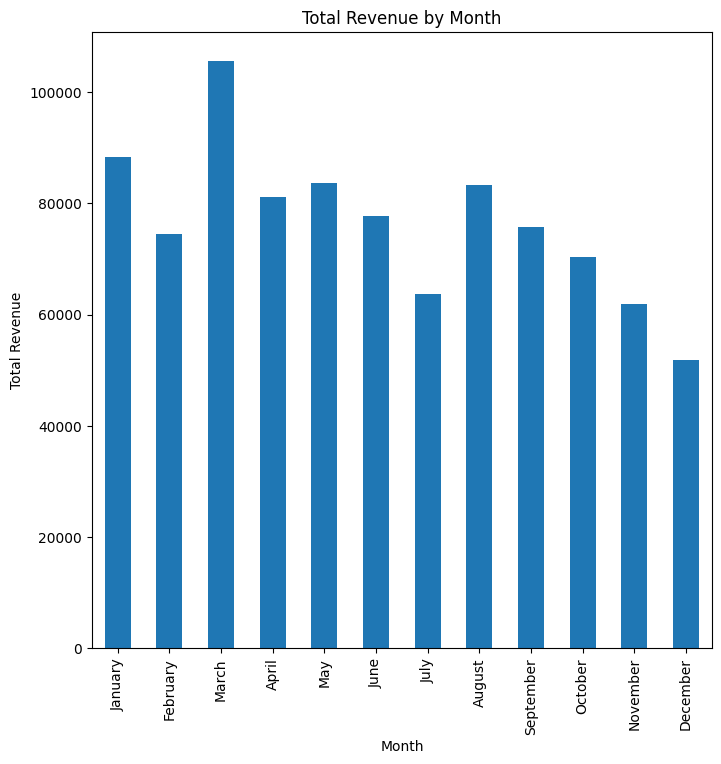

In [672]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_data_cleaned.groupby(sales_data_cleaned['order_date'].dt.month_name())['total_price'].sum().reindex(month_order).plot(kind='bar', figsize=(8, 8))

plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


##### The Best-Selling Product

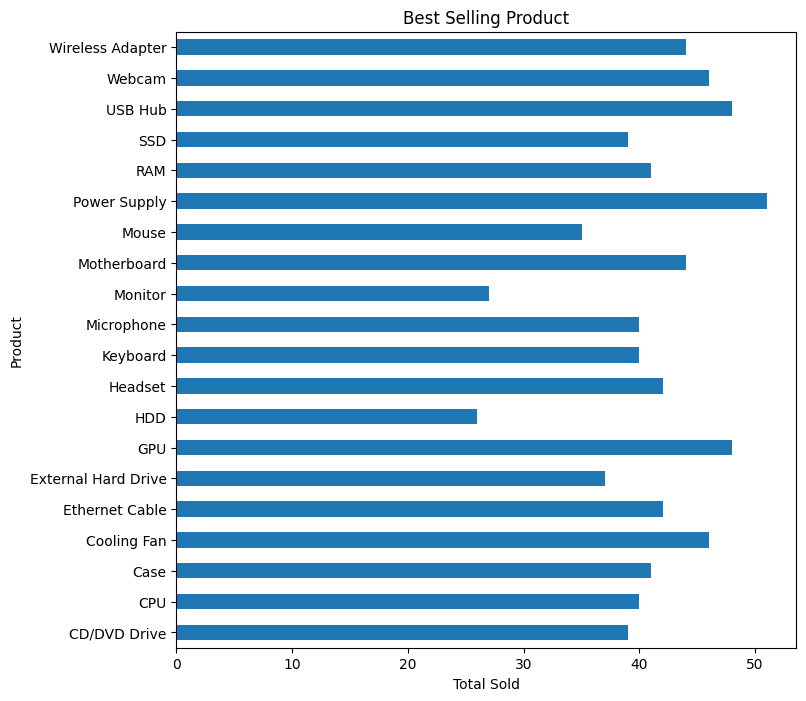

In [673]:
sales_data_cleaned.groupby('product')['quantity_ordered'].count().plot(kind='barh', figsize=(8, 8))

plt.title("Best Selling Product")
plt.ylabel("Product")
plt.xlabel("Total Sold")
plt.show()


##### Revenue by City

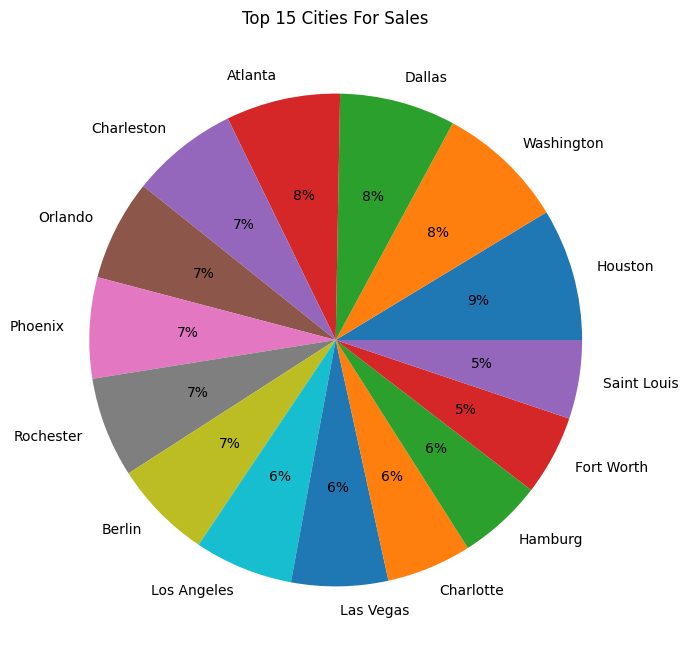

In [675]:
city_revenue = sales_data_cleaned.groupby('purchase_address_city')['total_price'].sum().sort_values(ascending=False)
city_revenue.head(15).plot(kind='pie', autopct='%1.0f%%', figsize=(8, 8))

plt.title('Top 15 Cities For Sales')
plt.ylabel(None)
plt.show()

##### Revenue by Country

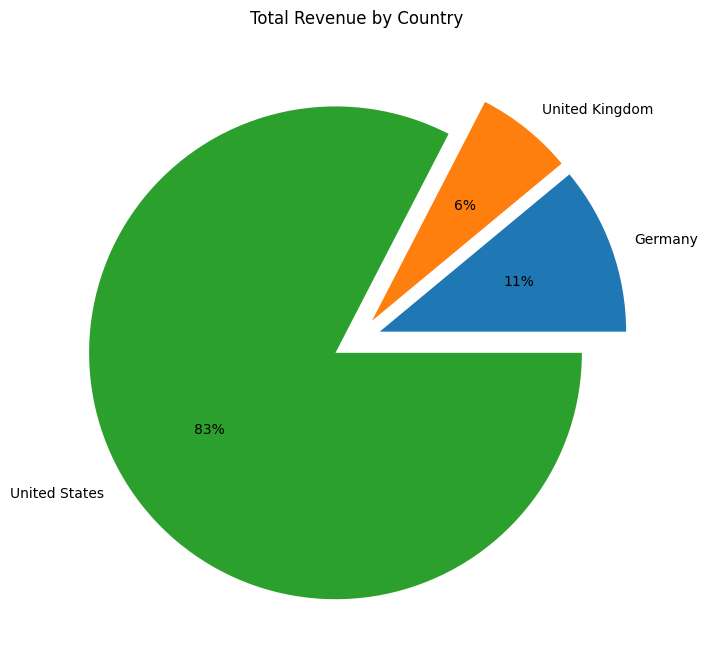

In [676]:
sales_data_cleaned.groupby('purchase_address_country')['total_price'].sum().plot(kind='pie', explode=(0.1, 0.1, 0.1) , autopct='%1.0f%%', figsize=(8, 8))

plt.title('Total Revenue by Country')
plt.ylabel(None)
plt.show()

##### What Countries Individual Products Are Sold Most

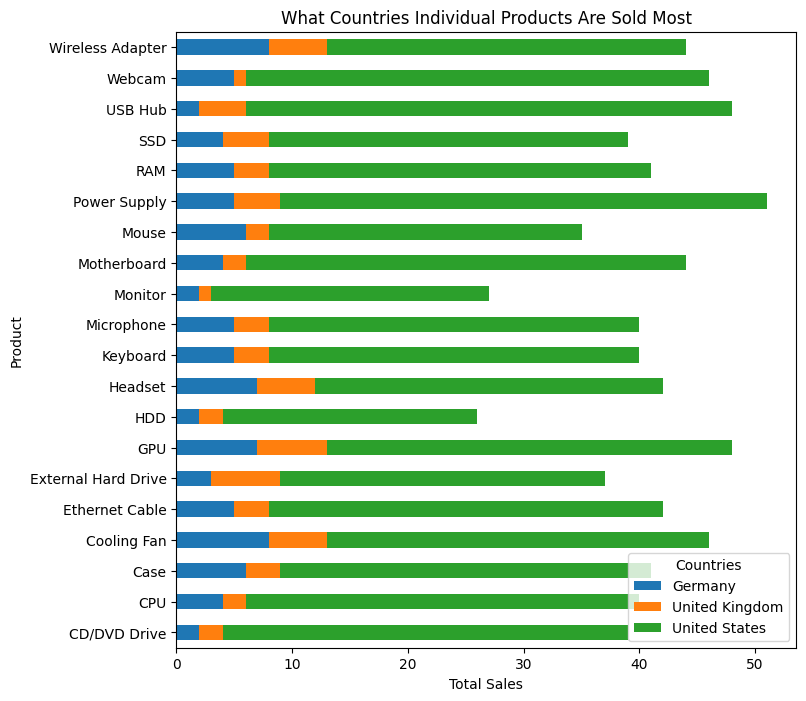

In [674]:
product_sales_each_country = sales_data_cleaned.groupby(['product', 'purchase_address_country'])['quantity_ordered'].count()
product_sales_each_country.unstack().plot(kind='barh', stacked=True, figsize=(8, 8))

plt.title("What Countries Individual Products Are Sold Most")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.legend(title="Countries")
plt.show()

### Evaluation

PC parts sales analysis has revealed that the month with the most revenue is March as during that month total was over 100,000. The analysis also revealed that the month with the lowest revenue is December, with revenue below 60,000. 

The best selling product with over 50 orders are PC power supplies. 

The 15 best cities for sales as revealed by the analysis are Dallas, Washington, Houston, Saint Louis, Fort Worth, Atlanta, Charleston, Orlando, Phoenix, Los Angeles, Los Vegas, Charlotte, Berlin, Hamburg and Rochester. Twelve of these cities are from the United States, two are from Germany and one is from the United Kingdom. 

The analysis revealed that 83% of sales came from the United States, 11% came from Germany and 6% came from the United Kingdom. This is reflected in the 15 best cities for sales in which 12 of the cities are in the United States.

With most sales coming from the United States, this is reflected in the analysis as it reveals that most of each product sales come from the United States. Some products like the CD/DVD drive show equal sales in both Germany and the UK while others like the external hard drive have more sales in the UK than in germany but overall the US has the most sales across all products.


### Actionable Recommendations

Taking the analysis and evaluation into account, the United States should be looked at as the main focus of any marketing efforts with cities in the top 15 revealed in the analysis holding the biggest populations being prime targets for advertisements. The best time of year to run advertisements would be March, January and August as these months had the biggest spikes in revenue. The products to focus on would be power supplies, GPUs and USB hubs as these had the largest orders out of the 20 products on sale. Stocking up on these products would allow for excess demand to be met.